In [2]:
import os
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
from scipy.io import wavfile
from scipy import signal
import scipy as sp
import scipy.io
from scipy.io import savemat

import itertools
import pickle
import joblib
import random

par=20
tp=740

Ts=500
num_timepoints=750

## Transform to mat file

In [3]:
# for ds in ['HV','25','50','75','100']:

ds='frontal'
for num in range(5):

    data_name='shift_testout_{}_{}.pkl'.format(ds,num)
    file_name='ctg_{}_{}.mat'.format(ds,num)

    mean_test_out=joblib.load(data_name)
    ctg_hv=joblib.load(data_name)

    mdic = {"ctg": ctg_hv}
    savemat(file_name,mdic)

FileNotFoundError: [Errno 2] No such file or directory: 'shift_testout_frontal_0.pkl'

In [5]:
ds='occipital'
num=3

data_name='shift_testout_{}_{}.pkl'.format(ds,num)
file_name='ctg_{}_{}.mat'.format(ds,num)

mean_test_out=joblib.load(data_name)
ctg_hv=joblib.load(data_name)

mdic = {"ctg": ctg_hv}
savemat(file_name,mdic)

## Preprocess from TG analysis results

In [3]:
num=0 #occipital parietal frontal
# data_name='shift_testout_{}_HVLV.pkl'.format(num)
data_name='shift_testout_HV_{}.pkl'.format(num)
fig_name='ctg_{}.tif'.format(num)
file_name='ctg_{}.mat'.format(num)
fig_name2='diagonal_{}.tif'.format(num)
file_name2='diagonal_{}.csv'.format(num)
mean_test_out=joblib.load(data_name)
ctg_hv=joblib.load(data_name)

In [4]:
# ctg_hv=np.mean(mean_test_out,axis=0)

In [5]:
np.shape(ctg_hv)

(20, 740, 740)

In [6]:
# ctg_hv=[] #hv ctg data participants X model X time points
# for i in range(par):
    
#     temp_out2=[]
#     for t in range(tp):
    
#         temp_out=[]
#         for tt in range(tp):
            
#             temp=mean_test_out[t][i][tt][i]
#             temp_out.append(temp)
            
#         temp_out2.append(temp_out)
        
#     ctg_hv.append(temp_out2)

# ctg_hv=np.array(ctg_hv)

In [7]:
mdic = {"ctg": ctg_hv}
savemat(file_name,mdic)

## Diagonal plotting

In [7]:
auc_diagonal=[] #hv diagonal
for t in range(np.size(ctg_hv,axis=1)):
    temp=ctg_hv[:,t,t]
    auc_diagonal.append(temp)
    
m_ad=np.mean(auc_diagonal, axis=1)
m_ad=m_ad[125:]
time=np.linspace(-0.2, 1-1/Ts*10, 615, endpoint=False)

(0.47, 0.56)

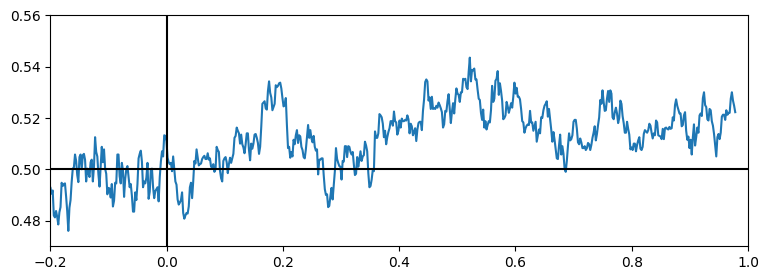

In [8]:
plt.figure(figsize=(9,3))
plt.plot(time, np.array(m_ad))
plt.axhline(y=0.5, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.xlim([-0.2, 1])
plt.ylim([0.47, 0.56])
# plt.show()

# plt.savefig(fig_name2)

In [31]:
np.savetxt(file_name2, auc_diagonal, delimiter=",")

## Plotting CTG

In [6]:
scores=np.average(ctg_hv,axis=0)
scores=scores[125:,125:]

In [7]:
# scores2=sp.ndimage.gaussian_filter(scores,sigma=3,truncate=3)   # 2D_smoothing

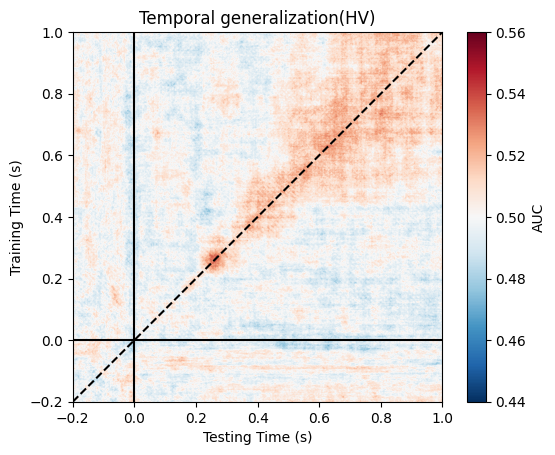

In [8]:
fig, ax = plt.subplots(1, 1)
im = ax.imshow(scores, interpolation='lanczos', origin='lower', cmap='jet', #RdBu_r
               extent=[-0.2, 1, -0.2, 1], vmin=0.44, vmax=0.56)

ax.plot([0, 1], [0, 1], transform=ax.transAxes,ls="--",c="0")
ax.set_xlabel('Testing Time (s)')
ax.set_ylabel('Training Time (s)')
ax.set_title('Temporal generalization(HV)')
ax.axvline(0, color='k')
ax.axhline(0, color='k')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('AUC')
cbar.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))

# fig.savefig(fig_name)